# **Library Imports**

In [128]:
import pandas as pd # Used for database manipulation
import numpy as np # Used for better arrays
import sklearn
from sklearn import linear_model # Used to train the linear regression model on our data
import matplotlib.pyplot as pyplot # Used to plot data on graphs
import pickle # Used to save the linear model
from matplotlib import style # Style for the graph

# Loading the database

In [129]:
# Loading the csv file, each piece of data is seperated by ","
data = pd.read_csv("Fish.csv", sep=",")
#  Setting all of our useful variables, we are excluding species
variables = ["Weight","Length1","Length2","Length3","Height","Width"]
data = data[variables]
print(data.head())

   Weight  Length1  Length2  Length3   Height   Width
0   242.0     23.2     25.4     30.0  11.5200  4.0200
1   290.0     24.0     26.3     31.2  12.4800  4.3056
2   340.0     23.9     26.5     31.1  12.3778  4.6961
3   363.0     26.3     29.0     33.5  12.7300  4.4555
4   430.0     26.5     29.0     34.0  12.4440  5.1340


In [130]:
# Predicted variable
predict = "Weight"

# All of the training data, in x excluding the predicted value
x = np.array(data.drop([predict], 1))
y = np.array(data[predict])

/tmp/ipykernel_61/2569955857.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = np.array(data.drop([predict], 1))


# Training the Linear Regression model
All of this code is commented out as we are using a model pre-saved in the Fish.pickle file

In [131]:
# Making the variable for the highest accuracy model
best = 0

for _ in range(100):
    # Splitting up all our variables of x and y into 4 variables, with a 5% of the data left out of the training model so the computer has to predict
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.25)

    #
    linear = linear_model.LinearRegression()

    # Fit this data to find a best fit line using x train and y train data
    linear.fit(x_train, y_train)
    # Sets the accuracy to the score of the testing group 
    acc = linear.score(x_test, y_test)
    if acc > best:
        # Saving all of the data that is the best
        bestx = x_test
        besty = y_test
        best = acc
        # 'with' - if you open files, and forget to close them, they become insecure, with automatically closes data streams
        # "wb" means write in binary, 'f' is file
        with open("Fish.pickle", "wb") as f:
            pickle.dump(linear,f)

In [132]:
# Loading in the Optimised model
pickle_in = open("Fish.pickle", "rb")

# Load optimised model
linear = pickle.load(pickle_in)

# Displaying Predicted data vs Actual data

In [133]:
predictions = linear.predict(bestx)
print('Top predictions\nPredicted, Actual')

# Printing each predicted point against its true value
for i in range(len(predictions)):
    print(round(predictions[i]), besty[i])
print('Top accuracy:', best)
# The different coefficients representing each variable of the multi-dimensional line, as well as the intercept. 
print(f'Coef: {linear.coef_}, Intercept: {linear.intercept_}')

Top predictions
Predicted, Actual
20 70.0
460 300.0
592 600.0
-91 19.9
712 850.0
134 110.0
-218 7.5
931 1000.0
72 78.0
87 87.0
301 270.0
799 900.0
197 170.0
686 800.0
872 950.0
-198 8.7
81 80.0
217 145.0
589 700.0
633 620.0
697 700.0
137 125.0
894 975.0
130 120.0
793 920.0
465 450.0
75 90.0
324 290.0
533 500.0
625 575.0
176 150.0
252 225.0
-51 40.0
569 600.0
594 700.0
-103 32.0
903 1100.0
492 500.0
85 85.0
-176 12.2
Top accuracy: 0.9268044445320553
Coef: [ 40.09734788   6.74450112 -21.20901427  22.87664385  27.60047423], Intercept: -521.1012248420049


## Graphing Data

In [134]:
# Sets the style of the graph
style.use("ggplot")

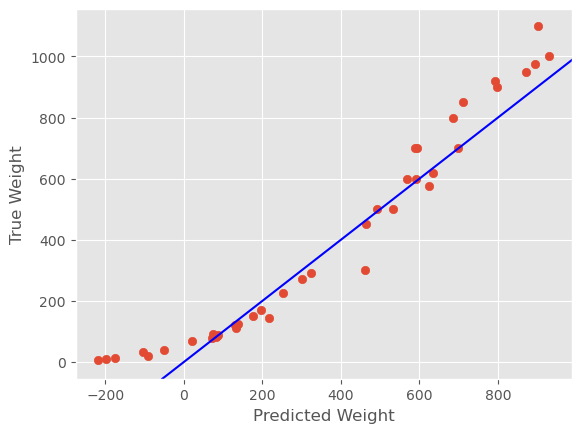

In [135]:
fig, ax = pyplot.subplots()

# Plotting Predicted value against True value
pyplot.scatter(predictions, besty)
pyplot.xlabel('Predicted Weight')
pyplot.ylabel('True Weight')
# Drawing a line representing a perfect linear model (each predicted is equal to the true value)
ax.axline((0, 0), slope=1., color='Blue', label='Perfect Linear Model')
pyplot.show()

The blue line, represents the data of a perfect linear regression model. The data fits the shape of the line mostly, with only 3 or 4 outliers, nearer the lower weights. 



---


While the machine learning model uses a multi-dimensional field to determine the linear prediction of a given set of data, we can sort of visualise how effective linear regression is on our data.

From the graphs, we can determine all of the data is linearly correlated, also indicated by the high accuracy of the linear regression model, only with a few seperate streams likey due to the different species categorisation left out of the dataset.

Best Accuracy: 0.9268044445320553


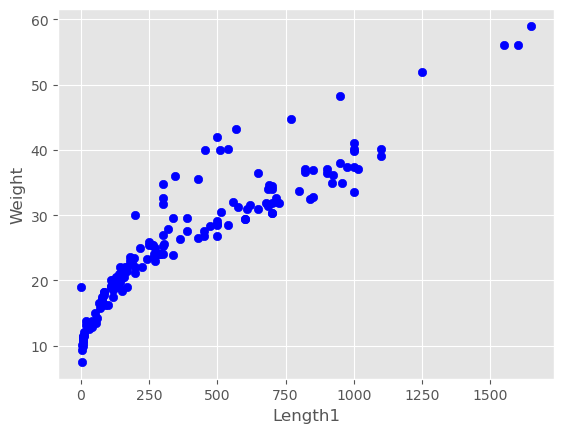

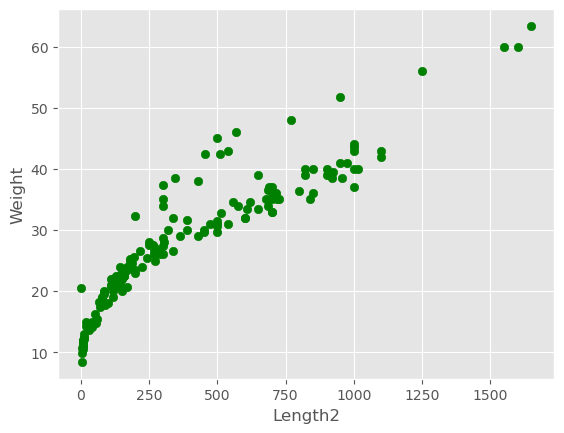

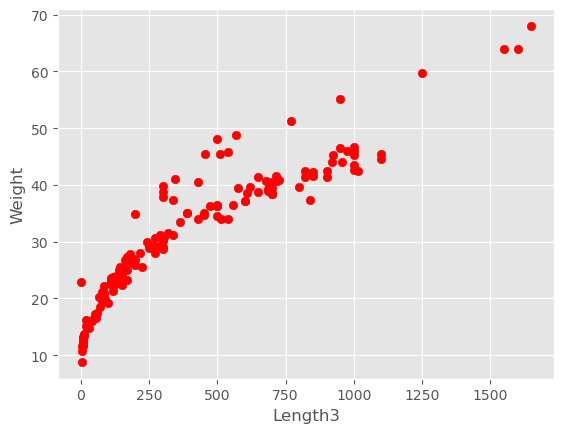

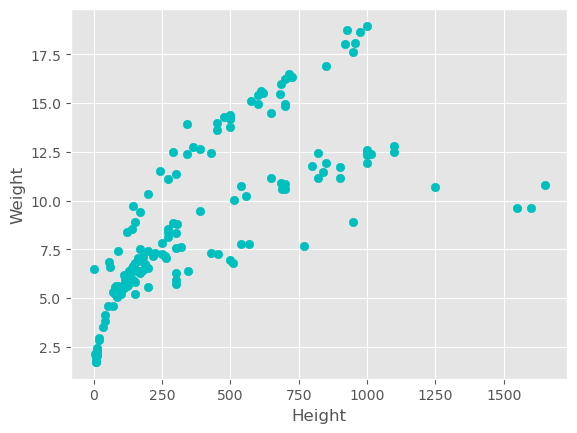

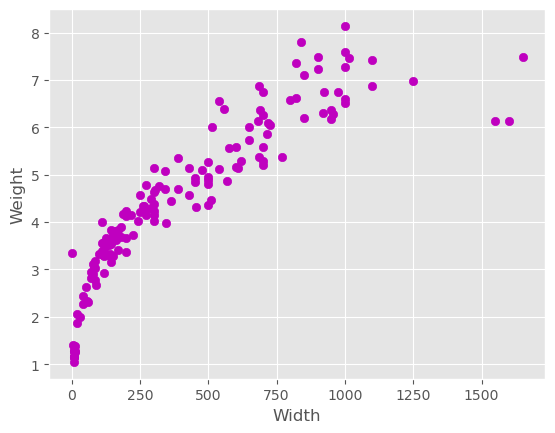

In [136]:
# Array of colours used by pyplot, making the colour of each graph unique
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
print(f'Best Accuracy: {best}')
# In the number of variables excluding 1 (weight), as a weight vs weight graph is obvious
for p in range(len(variables)-1):
    # Sets the 'predicted' axis (the true weight data) as the dependant variable, and the other data columns as the independant variable.  
    pyplot.scatter(data[predict], data[variables[p+1]], color=colors[p])
    # Setting labels using pyplot
    pyplot.xlabel(variables[p+1])
    pyplot.ylabel(predict)
    pyplot.show()